In [1]:
install.packages("sf")
install.packages("ggplot2")
install.packages("ggmap")  # for having a map as background

# NEED the development version of ggmap
if (!requireNamespace("devtools", quietly = TRUE)) {
  install.packages("devtools")
}
devtools::install_github("dkahle/ggmap")

将程序包安装入'C:/Users/zhong/AppData/Local/R/win-library/4.4'
(因为'lib'没有被指定)



程序包'sf'打开成功，MD5和检查也通过


Warning message:
"无法删除软件包 'sf' 的先前安装"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"拷贝C:\Users\zhong\AppData\Local\R\win-library\4.4\00LOCK\sf\libs\x64\sf.dll到C:\Users\zhong\AppData\Local\R\win-library\4.4\sf\libs\x64\sf.dll时出了问题：Permission denied"
Warning message:
"回复了'sf'"



下载的二进制程序包在
	C:\Users\zhong\AppData\Local\Temp\RtmpqsvP8N\downloaded_packages里


将程序包安装入'C:/Users/zhong/AppData/Local/R/win-library/4.4'
(因为'lib'没有被指定)



程序包'ggplot2'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\zhong\AppData\Local\Temp\RtmpqsvP8N\downloaded_packages里


将程序包安装入'C:/Users/zhong/AppData/Local/R/win-library/4.4'
(因为'lib'没有被指定)



程序包'ggmap'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\zhong\AppData\Local\Temp\RtmpqsvP8N\downloaded_packages里


Using GitHub PAT from the git credential store.





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\zhong\AppData\Local\Temp\RtmpqsvP8N\remotes1c581a591b\dkahle-ggmap-8b12beb/DESCRIPTION' ... OK
* preparing 'ggmap':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory 'ggmap/.github'
* building 'ggmap_4.0.0.900.tar.gz'



将程序包安装入'C:/Users/zhong/AppData/Local/R/win-library/4.4'
(因为'lib'没有被指定)



In [2]:
library(ggmap)
library(ggplot2)
library(sf)

register_stadiamaps(key = "953a00a4-1c69-45b1-a0e4-b3492abdf92b")

载入需要的程序包：ggplot2

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.
Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE



In [ ]:
# Load the data
shapefile_path <- "./transit_data/Stops.shp"
stops_data <- st_read(shapefile_path)
local_areas <- st_read("./transit_data/local-area-boundary.geojson")
vancouver_union <- st_union(local_areas)

# Transform the data to the same CRS
vancouver_union <- st_transform(vancouver_union, crs = 4326)
stops_data <- st_transform(stops_data, crs = st_crs(vancouver_union))
vancouver_data <- st_intersection(stops_data, vancouver_union)

Reading layer `Stops' from data source 
  `D:\ME 2024 UBC\ECON 326\econ326\transit_data\Stops.shp' using driver `ESRI Shapefile'
Simple feature collection with 8785 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -123.4231 ymin: 49.00439 xmax: -122.3029 ymax: 49.47356
Geodetic CRS:  WGS 84
Reading layer `local-area-boundary' from data source 
  `D:\ME 2024 UBC\ECON 326\econ326\transit_data\local-area-boundary.geojson' 
  using driver `GeoJSON'
Simple feature collection with 22 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -123.2248 ymin: 49.19894 xmax: -123.0232 ymax: 49.29581
Geodetic CRS:  WGS 84


Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


In [4]:
# set up the map's bounding box
bbox <- st_bbox(vancouver_union)
print("Bounding Box:")
print(bbox)

map_bbox <- c(
  left = as.numeric(bbox["xmin"]),
  bottom = as.numeric(bbox["ymin"]),
  right = as.numeric(bbox["xmax"]),
  top = as.numeric(bbox["ymax"])
)
print("Map BBox:")
print(map_bbox)

[1] "Bounding Box:"
      xmin       ymin       xmax       ymax 
-123.22485   49.19894 -123.02320   49.29581 
[1] "Map BBox:"
      left     bottom      right        top 
-123.22485   49.19894 -123.02320   49.29581 


ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


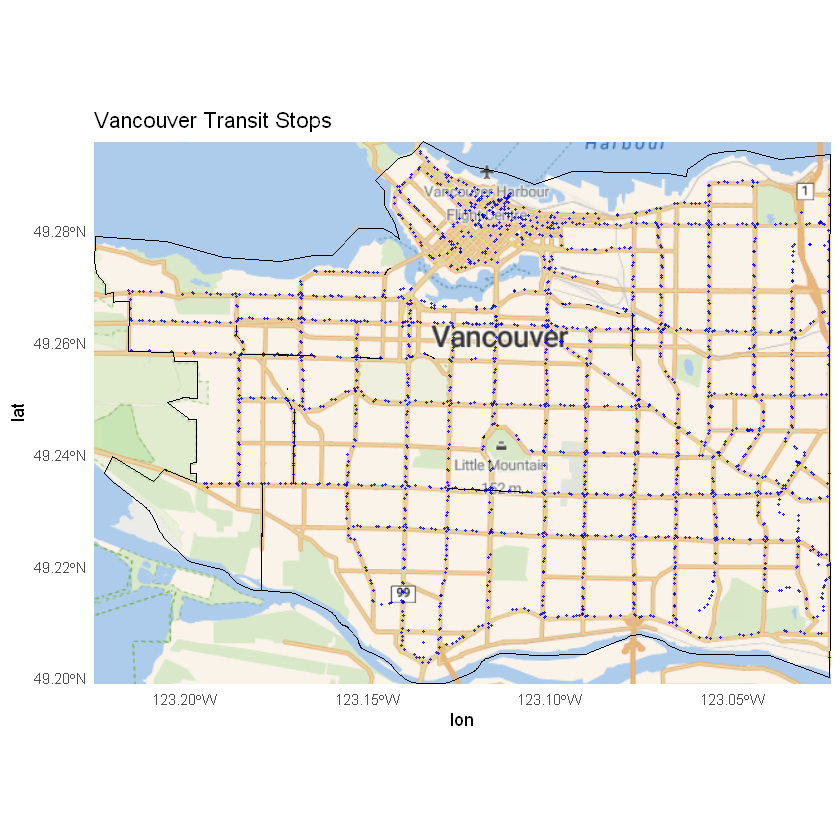

In [5]:
desired_zoom <- 12

# Use the stadiamaps package to get a base map
base_map <- tryCatch(
  {
    get_stadiamap(
      bbox = map_bbox,
      zoom = desired_zoom,
      maptype = "outdoors",
      # Can be be one of "stamen_terrain", "stamen_toner", "stamen_toner_lite",
      # "stamen_watercolor", "alidade_smooth",
      # "alidade_smooth_dark", "outdoors", "stamen_terrain_background",
      # "stamen_toner_background""stamen_terrain_labels""stamen_terrain_lines"
      #"stamen_toner_labels", "stamen_toner_lines"
    )
  },
  error = function(e) {
    message("[ERROR]: cannot generate stadiamap ", e$message)
    NULL
  }
)

# Generate the map with ggplot2
ggmap(base_map) +
  geom_sf(
    data = vancouver_union,
    fill = NA,
    color = "black",
    inherit.aes = FALSE
  ) +
  geom_sf(
    data = vancouver_data,
    color = "blue",
    size = 0.5,
    alpha = 0.7,
    inherit.aes = FALSE
  ) +
  theme_minimal() +
  labs(title = "Vancouver Transit Stops")
